# Traitement du signal - G1

TP2 : Analyse spectrale

---

## Objectif

Ce TP propose une introduction à l'analyse spectrale au sens de Fourier. L'analyse spectrale permet de représenter un signal en fonction de la densité spectrale d'énergie ou de puissance aux fréquences qu'il contient, au moyen des séries de Fourier ou de la transformée de Fourier. Parfaitement équivalente à la représentation temporelle, la représentation fréquentielle permet d'observer le signal sous un autre angle et de mieux interpréter sa nature physique. A titre d'exemple, notre système auditif est structuré pour analyser les signaux acoustiques par bandes de fréquences. 

**Au cours de ce TP,** nous  utiliserons des **signaux simulés**, dont le spectre théorique est connu, ainsi que des **signaux réels** enregistrés (musique, chant d'oiseau, bruits de moteur...).

**Avant le TP,** il convient de revoir et de connaître l'ensemble des cours et TD de traitement du signal, et en particulier le chapitre 2 sur les représentations fréquentielles, les séries de Fourier et la transformée de Fourier. En particulier, vous devez connaître les représentations fréquentielles (spectres) de signaux périodiques tels que sinus, signal rectangulaire, signal triangulaire... Enfin, vous devez **lire attentivement le document distribué et disponible sur Moodle sur la transformée de Fourier discrète (TFD).** 

### A l'issue de ce TP :
#### Vous comprendrez :
* La dualité temps-fréquence, cf.le théorème de Gabor.
* La différence entre la transformée de Fourier discrète (TFD), la transformée de Fourier continue (TFC) et les séries de Fourier.
* L'utilité et l'effet du fenêtrage temporel.
* Le principe et l'intérêt de l'analyse temps-fréquence (généralisation de l'analyse spectrale).

#### Vous saurez :
    
* Identifier les caractéristiques d'un signal à partir de son spectre de Fourier.
* Choisir les paramètres d'une analyse spectrale numérique (s'appuyant sur la TFD et la FFT) en fonction des objectifs de l'analyse, en particulier le fenêtrage (choix de la fenêtre, taille),
* Identifier les caractéristiques d'un signal à partir de son spectrogramme.

**Description du TP** : le travail à effectuer comprend 4 parties illustrant les points suivants :

1. une introduction et validation de la configuration logicielle  montrant des résultats d'analyse fréquentielle d'un signal réel ;
2. l'analyse de signaux périodiques ;
3. l'effet du fenêtrage temporel ;
4. l'analyse temps-fréquence.

## Travail à effectuer

- Chaque TP commence par une session d’introduction (1h - 1h) visant à présenter les objectifs
et les attendus du TP et vérifier le bon fonctionnement des ressources matérielles.
- Par la suite, vous devez travailler en binôme pour finir le TP. Notez que vous avez accès aux salles informatiques quand vous voulez.
- Une deuxième séance (1h - 1h) est prévue pour répondre aux dernières questions, avant le dépôt des comptes-rendus.
- Les résultats obtenus doivent être commentés d’une façon détaillée et liée au contenu du cours de Traitement du Signal.

0. (Re)lire attentivement le document distribué et disponible sur Moodle sur la transformée de Fourier discrète (TFD).
1. Compléter ce notebook par binôme en répondant à l'ensemble des questions posées en utilisant des cellules `markdown`. Ce document fait office de rapport de TP.
2. **Toute réponse inclue en commentaire dans une cellule de code ne sera pas prise en compte !**
3. **Remarque importante :** pour tous les exercices, se reporter au code de référence fourni sous les énoncés.
4. Toute illustration numérique devra être accompagnée de *commentaires en lien avec le contenu du cours*.
5. **Rendu du rapport** :
   - Déposez votre travail sur Moodle sous la forme d'une unique archive `.zip` contenant votre notebook complété et une version au format `.pdf` (barre de menu Jupyter notebook : `File > Download as > PDF via HTML (.pdf)`). En cas de problème, vous pouvez exportez votre rapport au format `.html` (`File > Download as > HTML`).
   - Le nom de votre archive devra *obligatoirement* suivre la convention `tp2_Nom1_Nom2.zip` (remplacer `Nom1` et `Nom2` par le nom de chacun des membres du binôme).
   - Le dépôt devra être effectué avant la date limite, dans la section prévue à cet effet.

## Installation

- Récupérer l'archive du tp1 sur `Moodle` et la décompresser sur votre espace réseau;
- Décompresser l'archive `.zip`;
- Renommer le dossier sous la forme `tp2_Nom1_Nom2`;
- Dupliquer le fichier du notebook et le renommer `tp2_Nom1_Nom2.ipynb`;
- **Sous windows** : (ordinateurs de Centrale)  
  - ouvir une invite de commande `Anaconda` ([`Anaconda command prompt`](https://docs.anaconda.com/anaconda/install/verify-install/));
  - lancer la commande suivante
  ```bash
   U:  # se déplacer sur votre disque réseau U (valable pour les ordinateurs de Centrale)
   jupyter notebook  # lancer jupyter notebook
   ```
- **Sous ubuntu** : (ordinateurs de Centrale) 
  - ouvrir une invite de commande (`qterminal`)
  - lancer les commandes suivantes de puis le terminal
  ```bash
   conda init bash
   source ~/.bashrc
   jupyter notebook
   ```
- **Sur votre machine** :
  - ouvrir un terminal (`Anaconda command prompt` sur Windows, terminal usuel sur Mac ou Ubuntu) 
  - lancer les commandes suivantes
  ```bash
   cd <path to tp1> # remplacer <path to tp1> par le chemin vers l'archive du tp1
   conda create --name tsi-g1 --file requirement.txt --channel conda-forge  # à ne faire que lors de la première installation
   conda activate tsi-g1
   jupyter notebook  # lancer jupyter notebook
   ```
- Vous déplacer dans l'arboresence fichiers jusque dans le `tp2` que vous venez de télécharger, et ouvrir le fichier `tp2.ipynb`.

---


## Configuration 

In [1]:
%load_ext autoreload
%autoreload 2

from os.path import join

import bokeh.plotting as bkplt
import matplotlib.pyplot as plt
import numpy as np
from module_TDS import *
from scipy.io.wavfile import read

data_path = "files"  # path to sound files

Loading BokehJS ...

### Premiers pas : validation de la configuration 

Exécuter la séquence de cellules ci-dessous pour vérifier que tout fonctionne normalement et avoir un premier aperçu de ce TP.

### Génération de signaux modèles : cosinus, sinus, triangle et rectangle

Nous utiliserons la fonction suivante :

```python
    y, t = synth_signal(type, freq, Fech, Nech)
```

- `type` : `"cosinus"`, `"sinus"`, `"rectangle"` ou `"triangle"` 
- `freq` : par défaut 1 
- `Fech` : par défaut 128 
- `Nech` : par défaut 256 

_Exemples :_

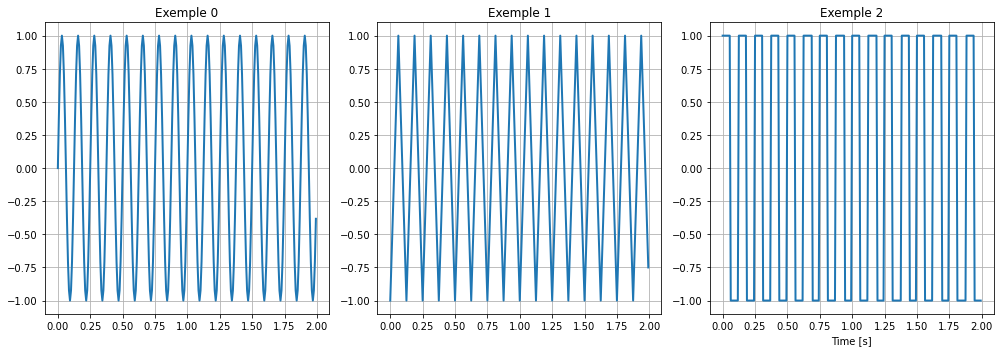

In [2]:
f0 = 8  # fréquence fondamentale du signal en Hz
Fe = 128  # fréquence d'échantillonnage en Hz
T = 2  # durée du signal en secondes
N = int(np.ceil(Fe * T))  # nombre d'échantillons du signal

# sinus :
t, y0 = synth_signal(type="sinus", freq=f0, Fech=Fe, Nech=N)

# triangle périodique :
t, y1 = synth_signal(type="triangle", freq=f0, Fech=Fe, Nech=N)

# rectangle périodique
t, y2 = synth_signal(type="rectangle", freq=f0, Fech=Fe, Nech=N)

# Représentation graphique
display_signal(np.vstack((y0, y1, y2)), t, titleroot="Exemple ");

### Calcul du spectre
Pour calculer la transformée de Fourier discrète (TFD) d'un signal (échantillonné), nous utiliserons la fonction `fft` de la librairie `numpy` :

`X = np.fft.fft(x)`

qui donne accès à une version échantillonnée $X[k]$ de la transformée de Fourier $X(\nu)$ (voir [cours sur la TFD](https://moodle2122.centralelille.fr/pluginfile.php/13191/mod_resource/content/2/transfo_Fourier_discrete.pdf)).

Nous utiliserons aussi la fonction suivante pour **estimer la densité spectrale d'énergie** associée à $|X(\nu)|^2$ d'un signal $x(t)$ :

`f, Sx = spectre_signal(x, Fech, fenetre, sym)`

* `fenetre` : au choix parmi "boxcar" (porte rectangulaire), "hann", "hamming", "gaussian", "triang", "blackman"
* `sym = False` : $0\leq \nu \leq Fe/2$, on ne regarde que les fréquences positives (physiques)
* `sym = True` : $-Fe/2\leq \nu \leq +Fe/2$, on regarde toutes les fréquences (mathématiques)

Avant d'estimer le spectre d'un signal, on le multipliera le plus souvent par une **fenêtre d'analyse** dont nous allons par la suite étudier l'influence (appelée aussi fenêtre *d'apodisation*). Par défaut, cette fenêtre d'analyse sera la fenêtre rectangulaire qui vaut 1 sur tout l'intervalle où le signal est défini.

Rappelons que nous appellerons spectre d'un signal sa **densité spectrale d'énergie** associée à $|X(\nu)|^2$, éventuellement après multiplication par une fenêtre temporelle (voir partie 2).

_Exemple : spectre d'un signal sinusoïdal (`y1` généré plus haut) avec une fenêtre rectangulaire_

#### Spectre "mathématique"

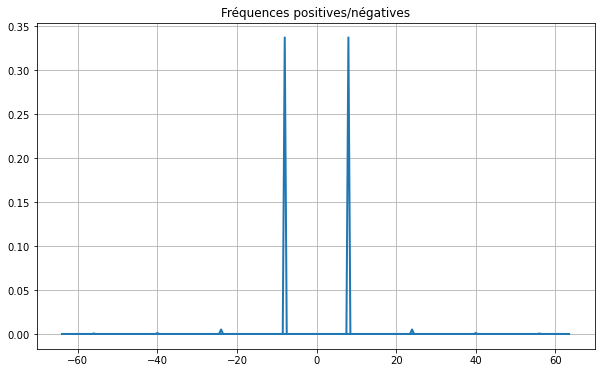

In [3]:
f_sym, Sx_sym = spectre_signal(y1, Fe)

# Représentation graphique
display_signal(Sx_sym, f_sym, titleroot="Fréquences positives/négatives");

#### Comparaison avec le carré de la tranformée de Fourier discrète 

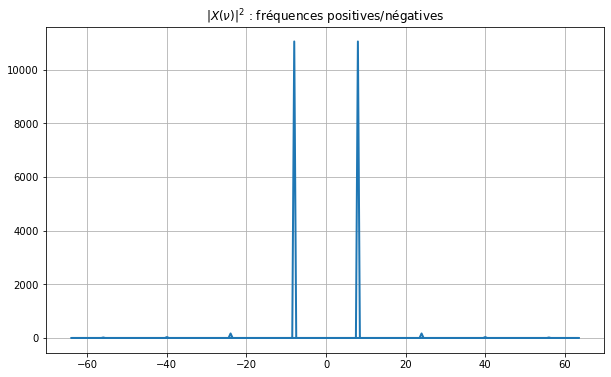

In [4]:
Y1 = np.fft.fft(y1)

# Représentation graphique du module carré de la TFD :
display_signal(
    np.abs(Y1) ** 2, f_sym, titleroot=r"$|X(\nu)|^2$ : fréquences positives/négatives"
);

#### Spectre "physique"

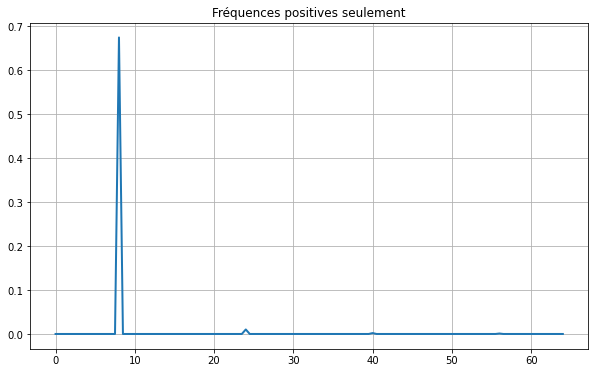

In [5]:
f, Sx = spectre_signal(y1, Fe, posfreq=True)

display_signal(Sx, f, titleroot="Fréquences positives seulement");

In [6]:
Fe, x = read(join(data_path, "bird.wav"))

sd.play(x, Fe)

### <font color="green"> Si vous avez entendu un oiseau chanter, c'est parti !</font>

---
## <a id='Partie1'></a> Partie 1 : Analyse de signaux périodiques

L'objectif de cette première partie est de voir dans quelles conditions la Transformée de Fourier calculée numériquement, c'est-à-dire une *tranformée de Fourier discrète (TFD)*, est conforme à la TF théorique, c'est une transformée de Fourier analogique calculée grâce à l'intégrale de Fourier.

En effet, en Python, nous travaillons avec des signaux échantillonnés, mais nous réfléchissons avec des signaux analogiques. 

Dans un premier temps (sections 1.1 à 1.3), nous travaillerons sur des signaux périodiques dont la TF est connue : sinus à 1 fréquence, superposition de 2 sinus de fréquences différentes, signaux rectangulaires et triangulaires périodiques.    

**Rappel :** en pratique, on utilise l'algorithme Fast Fourier Transform (FFT) pour calculer rapidement la TFD d'un signal discret.

_Remarque : les modules utilisés durant ce TP pour définir les fonctions de notre module_ `module_TDS.py` :

* le package Python [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html?highlight=fft#module-numpy.fft) permet de manipuler les outils standard associés à l'analyse de Fourier.

* le package Python [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) permet de réaliser de nombreuses opérations sur les signaux.



### 1.1. Signal sinusoïdal monochromatique

#### Préparation d'un signal sinusoïdal échantillonné

* Générer et tracer un signal sinusoïdal de fréquence `f0 = 16`, échantillonné à la fréquence `Fe = 128`, et en choisissant le nombre d'échantillons de telle sorte qu'on ait un nombre entier de périodes du signal, par exemple 8 :


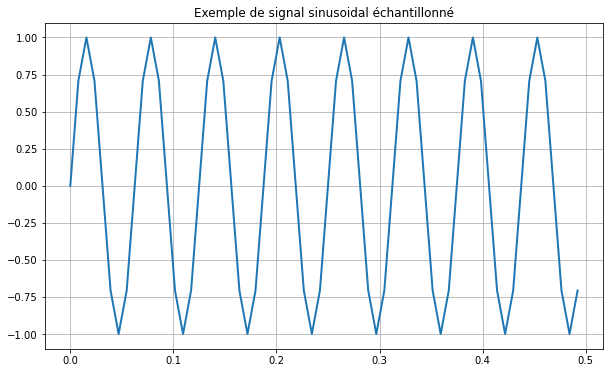

In [7]:
f0 = 16  # fréquence fondamentale du signal en Hz
Fe = 128  # fréquence d'échantillonnage en Hz
T = 8 / f0  # durée du signal en secondes = 8 périodes ici.
N = int(np.ceil(Fe * T))  # nombre d'échantillons du signal

# sinus :
t, x = synth_signal(type="sinus", freq=f0, Fech=Fe, Nech=N)

display_signal(x, t, titleroot="Exemple de signal sinusoidal échantillonné");

#### On calcule la transformée de Fourier discrète (TFD) du signal en utilisant la fonction `fft`
On en représente ensuite d'abord le module :
_Remarque : la fonction `fftfreq` fournit la liste des fréquences `freq[k]` associées aux `X[k]`._

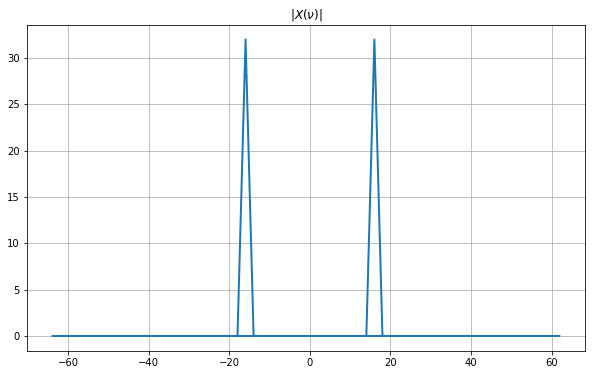

In [8]:
N = np.size(x)

X = np.fft.fft(x)  # calcul de la TFD du signal x

freq = np.fft.fftfreq(
    N, 1 / Fe
)  # liste des N fréquences discrètes associées, de -Fe/2 à Fe/2

display_signal(np.abs(X), freq, titleroot=r"$|X(\nu)|$");

Représentons maintenant la phase de `Xf` c'est-à-dire son argument donné par la fonction `numpy.angle` : 

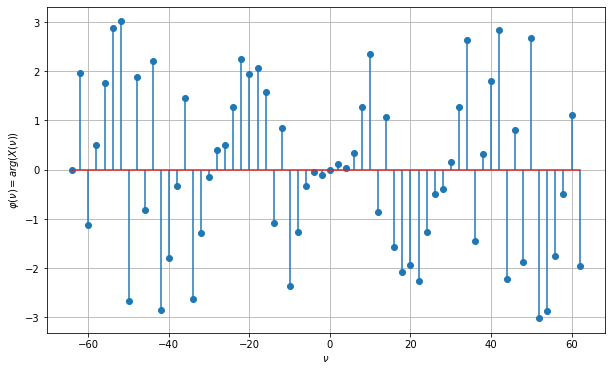

In [9]:
plt.figure(figsize=(10, 6))

plt.stem(freq, np.angle(X), use_line_collection=True)
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\varphi(\nu)=arg(X(\nu))$")

plt.grid(True)
plt.show()

**Attention !** la phase n'a pas grand sens aux fréquences où l'amplitude est très faible, proche de zéro (ou nulle !). On pourra préférer renormaliser la phase par l'amplitude pour visualiser uniquement les fréquences significatives. Ici nous proposons de ne considérer que les fréquences associées à une contribution supérieure ou égale à $10^{-3}$ fois l'amplitude maximale :

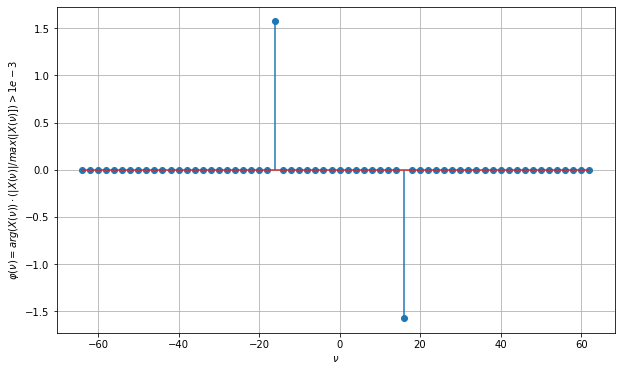

In [10]:
plt.figure(figsize=(10, 6))

# version renormalisée par l'amplitude
plt.stem(
    freq, np.angle(X) * (np.abs(X) / np.max(np.abs(X)) > 1e-3), use_line_collection=True
)
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\varphi(\nu)=arg(X(\nu))\cdot (|X(\nu)|/max(|X(\nu)])>1e-3$")
plt.grid(True)

plt.show()

Ou encore en regardant que les fréquences positives :

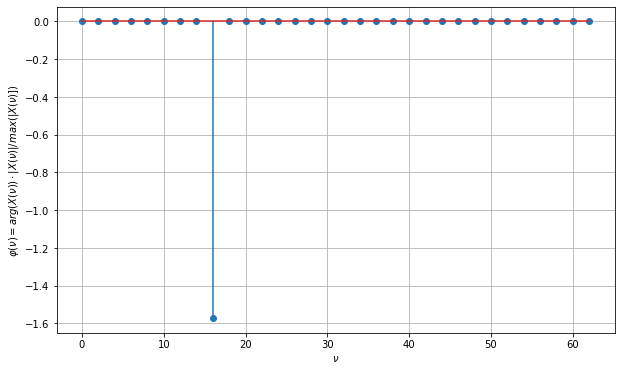

In [11]:
plt.figure(figsize=(10, 6))

# version renormalisée par l'amplitude
plt.stem(
    freq[0 : int(N / 2)],
    np.angle(X[0 : int(N / 2)])
    * (np.abs(X[0 : int(N / 2)]) / np.max(np.abs(X[0 : int(N / 2)])) > 1e-3),
)
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\varphi(\nu)=arg(X(\nu))\cdot |X(\nu)|/max(|X(\nu)])$")
plt.grid(True)

plt.show()

## Exercice 1
1. Observer le module et la phase de la TFD de ce signal sinusoïdal.
2. Quelle est la relation entre la fréquence d'échantillonnage, le nombre d'échantillons et la résolution fréquentielle de la TFD ?
3. A propos du module : comparer vos observations avec le résultat attendu théoriquement.
4. A propos de la phase : regarder d'abord les valeurs à la fréquence du signal. Que dire des valeurs obtenues aux autres fréquences ?
5. Faites varier la fréquence `f0` et vérifier qu'on observe un comportement similaire.
5. Faire varier le nombre d'échantillons, afin d'avoir un nombre non entier de périodes :  il suffit par exemple d'ajouter un échantillon par rapport au cas précédent. Observer l'effet sur la forme et l'amplitude de la transformée de Fourier. Que remarquez-vous ?
6. Les résultats observés sont-ils conformes à la théorie? Justifier.

## Question 1
Pour le module, on observe deux pics centrés en 16, de plus le signal est paire.
Pour la phase, on observe une phase de -1.6 radians pour la fréquence significative qui correspond à celle du pic de fréquence, de plus le signal est impaire.

## Question 2

La relation est $$ νs = Fe / n $$

## Question 3

Théoriquement, on devrait obtenir 2 pics de dirac (par la transformée de Fourier de sinus) et non des pics élargis qui apparaissent à cause de l'échantillonnage.

## Question 4

Si on normalise la phase à l'amplitude, on se rend

### 1.2. Signal sinusoïdal multi-composantes
On s'intéresse maintenant à un signal comprenant plusieurs fréquences, en commençant par la superposition de 2 signaux sinusoidaux.


### Exercice 2   

1. Simuler et tracer un signal `x1` superposition de sinus avec le même nombre d'échantillons, mais pour 2 fréquences `f1` et `f2` éloignées, par exemple 440 et 800 Hz. On fera attention à choisir des valeurs pertinentes pour le nombre de périodes et le nombre d'échantillons : c'est un compromis à trouver. _On pourra essayer d'écouter ce signal._
2. Simuler un second signal `x2` en utilisant cette fois des fréquences proches, par exemple 440 et 444 Hz. _On pourra essayer d'écouter ce signal._
3. Calculer et les transformées de Fourier de ces 2 signaux (fréquences éloignées ou proches) et les représenter graphiquement.
4. A fréquence d'échantillonnage `Fe` fixée, faire varier la durée `T` (et par conséquent le nombre d'échantillons `N`) entre 0,1 et 1 de sorte à étudier la durée d'observation permettant de distinguer ou non les 2 fréquences (440 et 444 Hz).
5. Quel est le plus petit écart que l'on puisse distinguer entre 2 fréquences pures ? en pratique ? en théorie ?

_Indication : choisir Fe plus grand que 2 x `(f1 + f2)/2` et un nombre d'échantillons "suffisamment grand"._



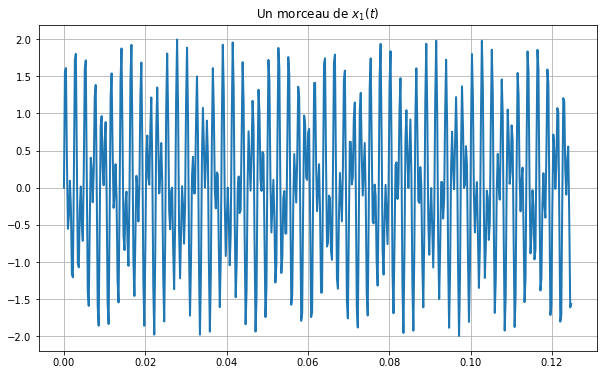

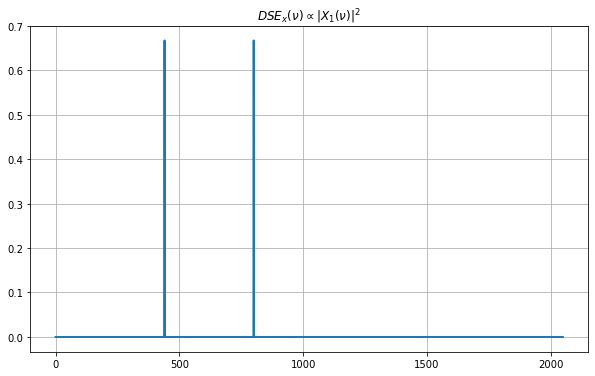

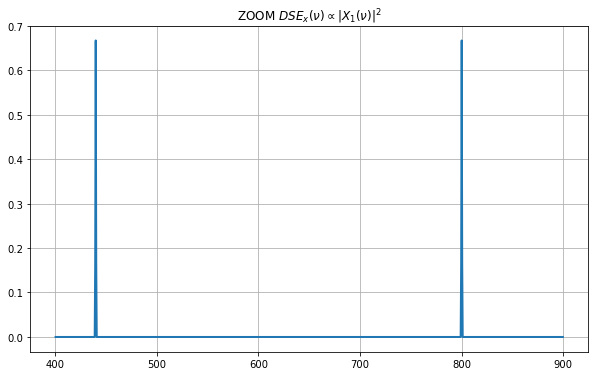

(-0.15, 0.15)

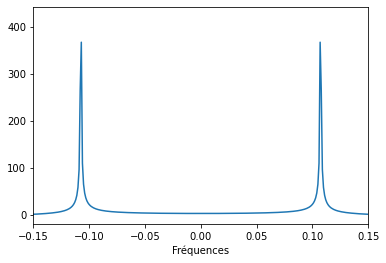

In [21]:
from numpy.fft import fft, ifft, fftshift

# Indications de code pour la question 1 :

Fe = 4096
T = 2  # durée du signal
N = np.ceil(T * Fe)  # ceil = arrondi supérieur
f1 = 440
f2 = 800

t, sig1 = synth_signal("sinus", f1, Fe, N)
# 20 échantillons par période
t, sig2 = synth_signal("sinus", f2, Fe, N)
# 10 échantillons par période
x1 = sig1 + sig2

# affichage du signal sur une durée de 2 secondes
display_signal(x1[0:512], t[0:512], titleroot=r"Un morceau de $x_1(t)$")

# on écoute :
sd.play(x1, Fe)

f, Sx1 = spectre_signal(x1, Fe, fenetre="hann", posfreq=True)
# spectre d'amplitude et de phase
# Sx1 = Sx1/Nech ;

# on voit l'effet du fenêtrage pour un nombre non entier de périodes, même si elle ne sont pas proches

display_signal(Sx1, f, titleroot=r"$DSE_x(\nu)\propto |X_1(\nu)|^2$")

# Pour zoomer sur les pics :
sel = tuple([(f > 400) & (f < 900)])
display_signal(Sx1[sel], f[sel], titleroot=r"ZOOM $DSE_x(\nu)\propto |X_1(\nu)|^2$");

# transformée de Fourier
M=1000 # Nombre de points de calcul de la fft : 1000
X=fft(x1,M)
f=np.arange(M)/M-1/2
plt.figure(2)
plt.plot(f,fftshift(abs(X)))
plt.xlabel("Fréquences")
plt.xlim([-0.15, 0.15])

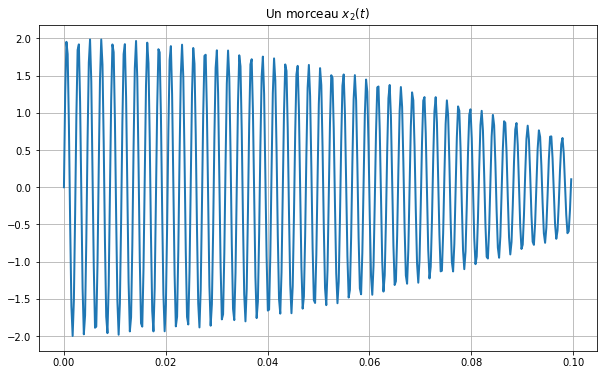

TypeError: 'function' object is not subscriptable

In [50]:
# Votre code ici :
Fe = 4096
T = .1#1# durée du signal
N = int(T * Fe)
f1 = 440
f2 = 444

t, sig1 = synth_signal("sinus", f1, Fe, N)
# 20 échantillons par période
t, sig2 = synth_signal("sinus", f2, Fe, N)
# 10 échantillons par période
x2 = sig1 + sig2

# le signal pendant 2 secondes :
display_signal(x2[0 : 2 * Fe], t[0 : 2 * Fe], titleroot=r"Un morceau $x_2(t)$")

# on écoute :
sd.play(x2, Fe)

# transformée de Fourier
#f, Sx2 = spectre_signal(x2, Fe, fenetre="hann", posfreq=True)
X = np.fft.fft(x2)


freq = np.fft.fftfreq(N, 1 / Fe)  # liste des N fréquences discrètes associées, de -Fe/2 à Fe/2
plt.xlim[430,450]
display_signal(np.abs(X), freq, titleroot=r"$|X(\nu)|$");


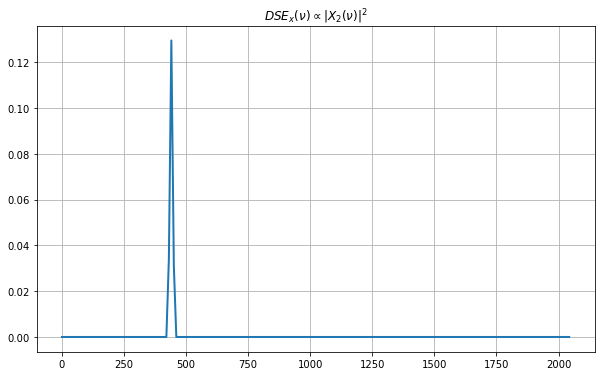

In [35]:
# spectre d'amplitude
f, Sx2 = spectre_signal(x2, Fe, fenetre="hann", posfreq=True)

# on voit l'effet du fenêtrage pour un nombre non entier de périodes, même si elle ne sont pas proches

display_signal(Sx2, f, titleroot=r"$DSE_x(\nu)\propto |X_2(\nu)|^2$");

Pour zoomer sur les pics :

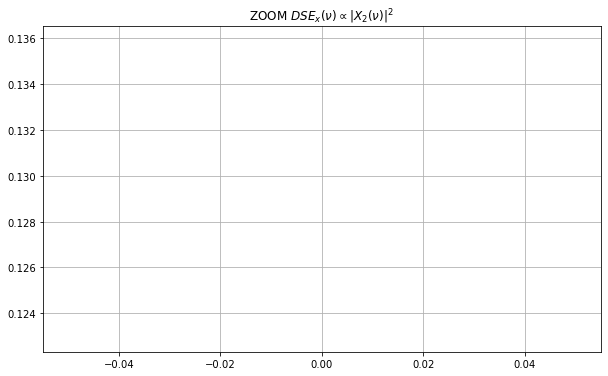

In [36]:
# Pour zoomer sur les pics :
sel = tuple([((f > 438) & (f < 446))])
display_signal(Sx2[sel], f[sel], titleroot=r"ZOOM $DSE_x(\nu)\propto |X_2(\nu)|^2$");

## question 3

(donner fft)

## question 4

## question 5






## Effet de la durée d'observation (ou d'acquisition)
Nous allons maintenant nous intéresser à l'effet d'une observation limitée à un segment de signal seulement, autrement dit à l'effet d'un fenêtrage temporel.

## Exercice 3 
1. Observer et commenter les spectres obtenus lorsqu'on ne prend en compte qu'un morceau de signal de durée limitée en jouant sur le paramètre `Tobs` (<`T`) dans la cellule de code ci-dessous. _Indication : on utilise le produit avec une fenêtre rectangulaire de durée `Tobs`pour extraire ce morceau._
2. Pourquoi n'observe-t-on pas généralement des raies parfaitement localisées ? Justifier la forme des pics observés.
3. Que se passe-t-il lorsque les fréquences choisies sont très proches ?
4. En pratique, à quelle condition observe-t-on correctement les 2 fréquences lorsqu'elles sont proches? (argument théorique + illustration expérimentale)

In [51]:
# Paramètres du signal étudié
Fe = 4096  # fréquence d'échantillonnage
T = 16  # durée du signal complet
N = T * Fe
f1 = 440
f2 = 444

# Simulation du signal (2 sinus à f1 et f2) :
t, sig1 = synth_signal("sinus", f1, Fe, N)
# 20 échantillons par période
t, sig2 = synth_signal("sinus", f2, Fe, N)
# 10 échantillons par période
x2 = sig1 + sig2

Fenêtre contenant le **paramètre `Tobs` à modifier** :

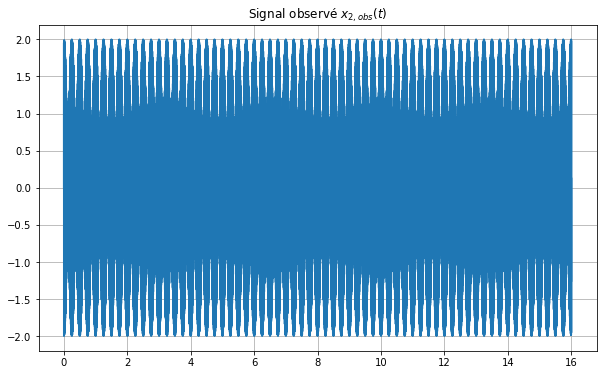

In [57]:
# Estimation du spectre dans la fenêtre d'observation [0, Tobs]

Tobs = (1 * T)  # <---- paramètre à modifier = durée d'observation prise en compte pour l'estimation du spectre

Nobs = int(np.ceil(Fe * Tobs))

# Fenêtre d'observation = 1 entre 0 et Nobs, 0 sinon.
fenetre_observation = np.zeros_like(x2)
fenetre_observation[0:Nobs] = np.ones(Nobs)

# Signal observé
display_signal(fenetre_observation * x2, t, titleroot="Signal observé $x_{2,obs}(t)$");

In [ ]:
# Analyse spectrale
f_sym, Sx2_obs = spectre_signal(fenetre_observation * x2, Fe)

# Représentation graphique :
display_signal(Sx2_obs, f_sym, titleroot="Fréquences positives/négatives")

# ZOOM sur la région d'intérêt :
sel = tuple([((f_sym > 430) & (f_sym < 450))])
display_signal(
    Sx2_obs[sel], f_sym[sel], titleroot=r"ZOOM $DSE_x(\nu)\propto |X_2(\nu)|^2$"
);

### 1.3. Signaux périodiques non sinusoïdaux
Nous reprenons ici les mêmes analyses pour des signaux périodiques classiques, rectangulaires et triangulaires.

### Exercice 4 : 
1. Générer et tracer des signaux rectangulaire et triangulaire périodiques de même fréquence fondamentale f0. Choisir la fréquence d'échantillonnage et le nombre d'échantillons de manière à observer les 4 premières harmoniques. _Indication : voir ci-dessous le code pour le signal rectangulaire et une indication pour le signal triangulaire._
2. Calculer et représenter leur transformée de Fourier théorique, donc leur développement en séries de Fourier (voir cours). Utiliser la fonction 'stem' à la place de 'plot' pour avoir la même représentation graphique que le spectre.
3. Calculer la TFD (fft) de ces signaux et les comparer aux résultats théoriques. On pourra représenter sur une même figure les spectres calculés et les spectres théoriques. _Noter au passage la normalisation en 1/N de la FFT pour permettre des comparaisons avec les coefficients de Fourier._
4. Que remarquez-vous ? Expliquez.

In [ ]:
# Indication pour le signal rectangulaire:

f0 = 128  # fréquence fondamentale
T = 3
Fe = 2000
N = int(np.ceil(Fe * T))

# Simulation du signal
t, x = synth_signal("rectangle", f0, Fe, N)
# 10 échantillons par période

# Cacul de la TFD (FFT)
X = (
    np.fft.fft(x) / N
)  # <------------ NOTER ICI LA NORMALISATION EN 1/N (cf. définition de la TFD)

freq = np.fft.fftfreq(N, 1 / Fe)

# Indication pour le signal rectangulaire:

# Série de Fourier pour les 4 premières harmoniques non nulles
freqn = f0 * np.arange(1, 8, 1)  # fréquence fondamentale + les harmoniques
b = np.zeros(7)
b[0:7:2] = 4 / (np.pi * np.arange(1, 8, 2))

In [ ]:
# Représentation graphique
plt.figure(figsize=(10, 6))

plt.plot(
    freq[0 : int(N / 2)], 2 * np.abs(X[0 : int(N / 2)]), c="k"
)  # spectre d'amplitude à l'échelle
plt.stem(
    freqn, abs(b), "--s", use_line_collection=True
)  # comparaison avec les coeff. de la série de Fourier

plt.xlabel(r"$\nu [Hz]$", fontsize=24)
plt.ylabel(r"$|X(\nu)|$ et $|b_n|$", fontsize=24)

plt.show()

In [ ]:
# votre code ici pour le signal triangulaire:

...

# Indication pour le signal triangulaire : série de Fourier pour les 4 premières harmoniques non nulles
a = np.zeros(9)
a[0:9:2] = 8 / (np.pi * np.arange(1, 10, 2)) ** 2
freqn = f0 * np.arange(1, 10, 1)  # fréquence des harmoniques + fondamental

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.stem(
    freqn, np.abs(a) ** 2, "-s"
)  # comparaison avec les coeff. de la série de Fourier
# plot(freq, Sx, c='k') # spectre d'amplitude à l'échelle

plt.show()

_Indication : pour le signal triangulaire, on pourra choisir de représenter le logarithme des amplitudes pour améliorer la lisibilité du graphique._

### 1.4. Signaux réels

Reprenons ici les analyses précédentes sur un signal musical réel (un enregistrement de cor anglais).

### Exercice 5 :
1. Charger et écouter le signal sonore `coranglais.npy` mis à votre disposition dans le dossier `files/` 
2. Ecouter ce son.
3. Observer ce signal et le module de sa transformée de Fourier en utilisant la `fft`.
4. Représenter son spectre d'énergie en utilisant la fonction `spectre_signal`.
5. Identifier les fréquences fondamentales associées aux notes entendues.
6. L'étude du spectre fréquentiel du signal dans son ensemble permet-elle d'identifier l'ordre d'appartition des notes ?

In [ ]:
# VOTRE CODE ICI (indications ci-dessous)

# Pour lire le signal :
x = np.load("files/coranglais.npy")
Fe = 20000

# On visualise
display_signal(
    x, np.linspace(0, (np.size(x) - 1) / Fe, np.size(x)), titleroot="Cor anglais"
)

In [ ]:
# On écoute
sd.play(x, Fe)

In [ ]:
# Pour représenter le spectre
freq, Sx = spectre_signal(x, Fe, posfreq=True)

# Pour les fréquences inférieures à 2000Hz :
display_signal(Sx[freq < 2000], freq[freq < 2000], titleroot="Spectre du signal x")

## <a id='Partie2'></a> Partie 2 : Effet du fenêtrage temporel sur l'analyse de signaux

Rappelons qu'observer un signal de durée finie est équivalent à le multiplier par une fenêtre rectangulaire sur cette même durée : 
$$
x_{\text{obs}}(t) = w(t)\cdot x(t).
$$

Dans le domaine fréquentiel, on estime alors la TFD $X_{obs}(\nu)$ de $x_{obs}(t)$ :
$$
X_{\text{obs}}(\nu) = W \ast X(\nu)
$$
Le choix de la fenêtre la plus adaptée est donc conditionnée par les propriétés de sa tranformée de Fourier $W(\nu)$ (voir cours sur la TFD).

La fonction `spectre_signal`qui vous est fournie permet de changer de fenêtre d'analyse très facilement en lui fournissant le paramètre `fenetre=...` :
* `boxcar`(défaut) : fenêtre rectangulaire,
* `hann` : fenêtre de Hann(ing),
* `hamming`, `gaussian`, `blackman` sont aussi des choix possibles.
* consulter https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows pour une liste complète.

**Objectif** : reprendre les analyses précédentes et observer l'effet du fenêtrage, en se souvenant qu'observer un signal de durée finie est équivalent à le fenêtrer par une fenêtre rectangulaire sur cette même durée. Or la transformée de Fourier d'une fenêtre rectangulaire est un sinus cardinal riche en lobes secondaires. On pourra préférer une autre fonction, même si ce n'est pas intuitif dans le domaine temporel.


### 2.1. Effet du choix de la fenêtre : signaux synthétiques

### Exercice 6
Reprendre l'exercice 3 (analyse d'un segment d'un signal constitué de 2 sinusoides proches) en faisant varier le paramètre `fenetre` ainsi que la durée `Tobs` (entre 0.1T et T par exemple) du segment considéré pour l'analyse ci-dessous.

#### 1. A durée d'observation `Tobs` fixée, quelles sont les conséquences du choix d'une fenêtre ou d'une autre ?

In [ ]:
# Paramètres du signal étudié
Fe = 4096  # fréquence d'échantillonnage
T = 16  # durée du signal complet
N = T * Fe
f1 = 440
f2 = 444

# Simulation du signal (2 sinus à f1 et f2) :
t, sig1 = synth_signal("sinus", f1, Fe, N)
# 20 échantillons par période
t, sig2 = synth_signal("sinus", f2, Fe, N)
# 10 échantillons par période
x2 = sig1 + sig2

Fenêtre contenant le paramètre `Tobs` et **le choix de la `fenetre` à modifier** :

In [ ]:
# Estimation du spectre dans la fenêtre d'observation [0, Tobs]

Tobs = (
    0.1 * T
)  # <---- paramètre à modifier = durée d'observation prise en compte pour l'estimation du spectre
Nobs = int(np.ceil(Fe * Tobs))

# Fenêtre d'observation = 1 entre 0 et Nobs, 0 sinon.
fenetre = "boxcar"  # ou au choix 'boxcar' (rectangulaire), 'hamming', 'bartlett', 'cosine', 'blackman'

fenetre_observation = np.zeros_like(x2)
fenetre_observation[0:Nobs] = sg.get_window(fenetre, Nobs)

# Signal observé
display_signal(fenetre_observation * x2, t, titleroot="Signal observé $x_{2,obs}(t)$")

In [ ]:
# Analyse spectrale
Sx2_obs = np.abs(np.fft.fft(fenetre_observation * x2)) ** 2

f_sym = np.fft.fftfreq(N, 1 / Fe)

# Représentation graphique :
display_signal(Sx2_obs, f_sym, titleroot="Fréquences positives/négatives")

In [ ]:
# ZOOM sur la région d'intérêt :
sel = tuple([((f_sym > 430) & (f_sym < 450))])
display_signal(
    Sx2_obs[sel], f_sym[sel], titleroot=r"ZOOM $DSE_x(\nu)\propto |X_2(\nu)|^2$"
)

#### 2.   Qu'observe-t-on à la place d'une raie pour chaque composante fréquentielle ?

**Réponse/commentaire (fin exercice 6) :**

### 2.2. [Bonus] Effet du choix de la fenêtre : signaux réels _(facultatif)_

### [Bonus] Exercice 7
Reprendre l'exercice 6 pour le signal musical fourni plus haut.

**Remarque :** la fonction `spectre_signal`peut aussi prendre en compte une fenêtre d'analyse au choix. La faire varier et observer l'impact sur le résultat.

In [ ]:
# Pour lire le signal :
x = np.load("files/coranglais.npy")
Fe = 20000

In [ ]:
# Analyse spectrale
f, Sx = spectre_signal(x, Fe, fenetre="blackman", posfreq=True)

display_signal(
    Sx[f < 2000], f[f < 2000], titleroot="Spectre du signal x, fenêtre de Hann"
)

Regardons de plus près la forme d'un pic :

In [ ]:
# Zoom autour de 790-820 Hz :
display_signal(
    Sx[(f > 790) & (f < 820)],
    f[(f > 790) & (f < 820)],
    titleroot="Spectre du signal x fenêtré",
)

## <a id='Partie3'></a> Partie 3 : Introduction à l'analyse temps-fréquence

### 3.1. Analyse de Fourier par fenêtre glissante

### Transformée de Fourier à fenêtre : spectrogramme & reconstruction

#### Représentation du contenu temps-fréquence de ce signal, son spectrogramme
Il est possible de détailler le contenu temps-fréquence d'un signal en l'analysant par morceau. En utilisant une fenêtre glissante, on obtient un série de spectres successifs que l'on rassemble dans une image, le **spectrogramme**. Pour illustrer cette représentation sur un exemple, nous allons lire un premier signal.

#### Lire, afficher, écouter un signal

Les signaux sont des vecteurs 1D, stockés en ligne ou en colonne.

**Pour lire un signal :** la fonction `read` mise à votre disposition permet
de charger simplement un certain nombre de signaux. 

Consulter l'aide en tapant `Maj+Tab+Tab` lorsque le curseur est sur la fonction.

La liste des signaux disponibles est:

* bird.wav
* glockenspiel_mono.wav
* aleluya.wav
* desactive_mono.wav

Nous lisons un signal issu d'un fichier `.wav` associé au 
chant d'un oiseau, avant de l'écouter ou de l'afficher.
(voir le dossier  `SONS\` pour d'autres exemples...).

In [ ]:
Fe, x = read(join(data_path, "bird.wav"))

N = np.size(x)
print("Fe = ", Fe)

Nous pouvons écouter ce son soit directement grâce à `sounddevice` soit en l'écoutant directement depuis un lecteur de fichiers `.wav` :

In [ ]:
sd.play(x, Fe)  # nécessite le module sounddevice !

Nous pouvons visualiser le signal associé à ce son :

In [ ]:
display_signal(x, np.linspace(0, N / Fe, N), titleroot="Signal écouté")

Pour obtenir une représentation qui permette de suivre l'évolution du
contenu fréquentiel du signal au cours du temps, on définit la notion 
de _transformée de Fourier à fenêtre_, ou _Short Term Fourier Transform_ en
anglais. Cette transformée possède 2 indices, un pour l'instant sur
lequel la fenêtre est centrée et un pour les fréquences.
Schématiquement, on obtient la transformée de Fourier à fenêtre en rassemblant 
dans une même représentation les spectres calculés sur des segments
de signal successifs. 

L'intérêt de cette représentation est de rassembler des transformées de Fourier 
locales (axe fréquentiel vertical) calculées sur des fenêtres temporelles régulièrement 
espacées (axe temporel horizontal) : en traduisant le carré de l'amplitude
de cette transformée de Fourier à fenêtre par une échelle de couleur, on en déduit 
le *spectrogramme*. On peut aussi montrer que l'énergie est conservée. Le carré de l'amplitude de la transformée de Fourier à fenêtre
s'interprète donc comme une densité d'énergie temps-fréquence.

En général, les fenêtres se superposent en temps (overlap) 
ce qui entraîne une certaine redondance qui est aussi source d'une 
bonne lisibilité de l'information temps-fréquence. Cette représentation 
redondante peut s'inverser pour reconstruire le signal d'origine, on parle d'un 
_pseudo-inverse_ .  
Les paramètres d'un spectrogramme sont:
* le type de la fenêtre choisie
* la taille de la fenêtre
* le pas de temps entre 2 fenêtres successives, noté `spacing` ici.

La fonction `spectrogramme` ci-dessous fournit directement une représentation graphique dont l'axe vertical
correspond aux fréquences (positives seules) échantillonnées entre $0$ et $\frac{F_e}{2}$ et l'axe 
horizontal correspond aux échantillons temporels. Il faut noter que les transformées
sont calculées sur des intervalles de temps de largeur `nperseg` espacés régulièrement tous les `nperseg/8` échantillons ici. 

Voici un exemple :

In [ ]:
f, t, Sxx = spectrogramme(x, Fe, window="hann", nperseg=256)

**Indication :** une échelle logarithmique est utilisée pour traduire l'amplitude du spectrogramme sur une échelle de couleur allant du bleu au jaune.

De plus, les instants et les fréquences pour lesquelles on observe le spectrogramme sont régulièrement espacés. Les instants considérés dépendent du pas entre 2 segments successifs analysés. Sur l'axe des fréquences on retrouve la résolution de la transformée de Fourier discrète d'un signal de longueur `nperseg` (largeur de la fenêtre d'analyse) échantillonné à la fréquence $F_e$.

Pour mieux comprendre : une version dynamique de l'observation de la transformée de Fourier à fenêtre (par segments). Nous allons travailler avec un signal raccourci de `n` échantillons défini ci-dessous :

In [ ]:
n = 2 ** 15  # 2^15 = 32768 points

xn = x[0:n]  # extraction de l'extrait de signal raccourci

t = np.linspace(0, n / Fe, n)  # liste des instants échantillonés

In [ ]:
sd.play(xn, Fe)  # nécessite le module sounddevice !

Nous pouvons visualiser le signal associé à ce son :

In [ ]:
display_signal(xn, t, titleroot="Signal raccourci");

### EXECUTER LES 2 CELLULES CI-DESSOUS SANS LES MODIFIER POUR LANCER L'ANIMATION INTERACTIVE

In [ ]:
# !!!! NE PAS MODIFIER CETTE CELLULE !!!!
# !!!! NE PAS MODIFIER CETTE CELLULE !!!!
from bokeh.layouts import column, row


def fft_segment(k=1):

    Fe = 44100  # 20000 pour le cor anglais
    n0 = k * 500
    N = 200
    L = 2 * N + 1
    # nombre d'échantillons considérés par segment
    sel = np.arange(
        n0 - N, n0 + N + 1, 1
    )  # indices des échantillons du segment sélectionné
    sigma = 100
    gauss_win = sg.get_window(
        ("gaussian", sigma), L
    )  # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

    x_segment = gauss_win * xn[sel]
    Xf = np.fft.fftshift(np.fft.fft(x_segment))

    xs = [[(n0 - N) / Fe, (n0 - N) / Fe], [(n0 + N) / Fe, (n0 + N) / Fe]]
    M = max(abs(xn))
    ys = [[-M, M]] * 2

    window_line.data_source.data["xs"], window_line.data_source.data["ys"] = xs, ys
    rx.data_source.data["x"], rx.data_source.data["y"] = t[sel], x_segment
    rX.data_source.data["y"] = abs(Xf)

    #    rx.data_source.data = dict(x=t[sel],y=x_segment)
    #    rX.data_source.data['y'] = abs(Xf)

    push_notebook()

    # !!!! NE PAS MODIFIER CETTE CELLULE !!!!


fig_xn = bkplt.figure(title="x", plot_height=200, plot_width=600)
fig_x = bkplt.figure(
    title="x_segment = signal fenêtré", plot_height=200, plot_width=300
)
fig_X = bkplt.figure(title="|FFT[x_segment]|", plot_height=200, plot_width=300)

Fe = 44100  # 20000 pour le cor anglais
n0 = 500
N = 200
L = 2 * N + 1
# nombre d'échantillons considéré par segment
sel = np.arange(
    n0 - N, n0 + N + 1, 1
)  # indices des échantillons du segment sélectionné
sigma = 100
gauss_win = sg.get_window(
    ("gaussian", sigma), L
)  # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
x_segment = gauss_win * xn[sel]
Xf = np.fft.fftshift(np.fft.fft(x_segment))
freq = np.fft.fftshift(
    np.fft.fftfreq(Xf.size, d=1.0 / Fe)
)  # liste des fréquences fournie par
# freq = arange(-Fe/2,Fe/2,Fe/L)

# !!!! NE PAS MODIFIER CETTE CELLULE !!!!

In [ ]:
# EXECUTER LA CELLULE PRECEDENTE PUIS CELLE-CI POUR LANCER LA VISU INTERACTIVE
# plot of the original signal xn
M = np.max(np.abs(xn))
rxn = fig_xn.line(t, xn)
window_line = fig_xn.multi_line(
    xs=[[(n0 - N) / Fe, (n0 - N) / Fe], [(n0 + N) / Fe, (n0 + N) / Fe]],
    ys=[[-M, M]] * 2,
    color="firebrick",
    line_width=2,
)
# plots of the segement and its Fourier transform
rx = fig_x.line(t[sel], x_segment)
rX = fig_X.line(freq, abs(Xf))

bkplt.show(column(children=[fig_xn, row(fig_x, fig_X)]), notebook_handle=True)
interact(fft_segment, k=(1, 65));  # rx=rx, rX=rX, window_line=window_line, k=(1,65));

### <font color="blue">Déplacer le curseur ci-dessus pour explorer le signal en temps et en fréquence </font>
Les 2 traits verticaux rouges indiquent le segment de signal fenêtré dont le spectre est représenté en bas à droite.

#### Commentez vos observations.

**On obtient le spectrogramme en représentant en colonne chacun des spectres des segments successifs. L'image est obtenue en traduisant les amplitudes par une échelle de couleurs :**

In [ ]:
f, t, Sxx = spectrogramme(xn, Fe, window="hann", nperseg=256)

### Exercice 8 
1. En utilisant le code ci-dessus, calculer et représenter les spectrogrammes du signal de cor anglais `coranglais.npy` analysé plus haut ou des sons `glockenspiel` et `desactive` fournis avec le TP dans le dossier `SONS\`. Observer et commenter.

2. (facultatif) La fonction`spectrogramme` fait appel à l'option
`window='hann'`. Quel est le rôle de cette option ?
Pourquoi le choix de la fenêtre est-il important ?

3. Expliquer à quoi correspondent les indices sur les axes horizontaux et verticaux du spectrogramme. Comment doit-on les lire et les interpréter ?

**Voir l'aide en ligne à**
https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions

### 3.3. [Bonus] Analyse temps-fréquence du signal de cor anglais

#### Jouer avec l'animation ci-dessous appliquée au signal musical de cor anglais : identifier les 3 notes jouées, les instants où elles sont jouées et les fréquences fondamentales associées.

In [ ]:
# Pour lire le signal :
x = np.load("files/coranglais.npy")
Fe = 20000

In [ ]:
# Extraction de l'extrait de signal raccourci
n = 56000

xn = x[0:n]

t = np.linspace(0, n / Fe, n)  # liste des instants échantillonés

sd.play(xn, Fe)

display_signal(xn, t)

In [ ]:
# !!!! NE PAS MODIFIER CETTE CELLULE !!!!
# !!!! NE PAS MODIFIER CETTE CELLULE !!!!
from bokeh.layouts import column, row


def fft_segment(k=1):

    Fe = 20000  # 20000 pour le cor anglais
    n0 = k * 500
    N = 200
    L = 2 * N + 1
    # nombre d'échantillons considérés par segment
    sel = np.arange(
        n0 - N, n0 + N + 1, 1
    )  # indices des échantillons du segment sélectionné
    sigma = 100
    gauss_win = sg.get_window(
        ("gaussian", sigma), L
    )  # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

    x_segment = gauss_win * xn[sel]
    Xf = np.fft.fftshift(np.fft.fft(x_segment))

    xs = [[(n0 - N) / Fe, (n0 - N) / Fe], [(n0 + N) / Fe, (n0 + N) / Fe]]
    M = max(abs(xn))
    ys = [[-M, M]] * 2

    window_line.data_source.data["xs"], window_line.data_source.data["ys"] = xs, ys
    rx.data_source.data["x"], rx.data_source.data["y"] = t[sel], x_segment
    rX.data_source.data["y"] = abs(Xf[abs(freq) < 2000])

    #    rx.data_source.data = dict(x=t[sel],y=x_segment)
    #    rX.data_source.data['y'] = abs(Xf)

    push_notebook()

    # !!!! NE PAS MODIFIER CETTE CELLULE !!!!


fig_xn = bkplt.figure(title="x", plot_height=200, plot_width=600)
fig_x = bkplt.figure(
    title="x_segment = signal fenêtré", plot_height=200, plot_width=300
)
fig_X = bkplt.figure(title="|FFT[x_segment]|", plot_height=200, plot_width=300)

Fe = 20000  # 20000 pour le cor anglais
n0 = 500
N = 200
L = 2 * N + 1
# nombre d'échantillons considéré par segment
sel = np.arange(
    n0 - N, n0 + N + 1, 1
)  # indices des échantillons du segment sélectionné
sigma = 100
gauss_win = sg.get_window(
    ("gaussian", sigma), L
)  # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
x_segment = gauss_win * xn[sel]
Xf = np.fft.fftshift(np.fft.fft(x_segment))
freq = np.fft.fftshift(
    np.fft.fftfreq(Xf.size, d=1.0 / Fe)
)  # liste des fréquences fournie par
# freq = np.arange(-Fe/2,Fe/2,Fe/L)

# !!!! NE PAS MODIFIER CETTE CELLULE !!!!

In [ ]:
# EXECUTER LA CELLULE PRECEDENTE PUIS CELLE-CI POUR LANCER LA VISU INTERACTIVE
# plot of the original signal xn
M = max(abs(xn))
rxn = fig_xn.line(t, xn)
window_line = fig_xn.multi_line(
    xs=[[(n0 - N) / Fe, (n0 - N) / Fe], [(n0 + N) / Fe, (n0 + N) / Fe]],
    ys=[[-M, M]] * 2,
    color="firebrick",
    line_width=2,
)
# plots of the segement and its Fourier transform
rx = fig_x.line(t[sel], x_segment)
rX = fig_X.line(freq[np.abs(freq) < 2000], np.abs(Xf[abs(freq) < 2000]))

bkplt.show(column(children=[fig_xn, row(fig_x, fig_X)]), notebook_handle=True)
interact(fft_segment, k=(1, 110))  # rx=rx, rX=rX, window_line=window_line, k=(1,65));

On obtient le spectrogramme en représentant en colonne chacun des spectres des segments successifs. L'image est obtenue en traduisant les amplitudes par une échelle de couleurs :

In [ ]:
f, t, Sxx = spectrogramme(xn, Fe, window="hann", nperseg=256)